In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print('Global Mobile Money Analysis')
print('=' * 50)
print('Analyzing mobile money adoption across ALL countries...')

# DATA LOADING AND PREPARATION 
print('\n Loading and preparing datasets...')
sent_df = pd.read_csv(r"C:\Users\Admin\Downloads\WB_FINDEX_FIN13BM.csv")
withdrew_df = pd.read_csv(r"C:\Users\Admin\Downloads\WB_FINDEX_FIN13CM.csv")

print(f' Sent Money Dataset: {sent_df.shape}')
print(f' Withdrew Money Dataset: {withdrew_df.shape}')

# Clean data by removing NaN values
sent_df_clean = sent_df.dropna(subset=['OBS_VALUE'])
withdrew_df_clean = withdrew_df.dropna(subset=['OBS_VALUE'])

print(f' Clean Sent Money Records: {len(sent_df_clean)}')
print(f' Clean Withdrew Money Records: {len(withdrew_df_clean)}')

print('')
print('GLOBAL STATISTICS')
print('=' * 30)

# Get unique countries
all_countries = sorted(list(set(sent_df_clean['REF_AREA'].unique()) | set(withdrew_df_clean['REF_AREA'].unique())))
print(f'Total Countries Analyzed: {len(all_countries)}')

# Calculate global averages
global_sent_avg = sent_df_clean['OBS_VALUE'].mean()
global_withdrew_avg = withdrew_df_clean['OBS_VALUE'].mean()
print(f' Global Average - Sent Money: {global_sent_avg:.2f}%')
print(f' Global Average - Withdrew Money: {global_withdrew_avg:.2f}%')

# === COUNTRY-BY-COUNTRY ANALYSIS ===
print('\n COUNTRY-BY-COUNTRY ANALYSIS')
print('=' * 40)

# Create comprehensive country comparison
country_stats = []

for country in all_countries:
    sent_data = sent_df_clean[sent_df_clean['REF_AREA'] == country]
    withdrew_data = withdrew_df_clean[withdrew_df_clean['REF_AREA'] == country]
    
    if len(sent_data) > 0 and len(withdrew_data) > 0:
        sent_mean = sent_data['OBS_VALUE'].mean()
        withdrew_mean = withdrew_data['OBS_VALUE'].mean()
        sent_std = sent_data['OBS_VALUE'].std()
        withdrew_std = withdrew_data['OBS_VALUE'].std()
        
        # Calculate adoption gap (sent - withdrew)
        adoption_gap = sent_mean - withdrew_mean
        
        country_stats.append({
            'Country_Code': country,
            'Country_Name': sent_data['REF_AREA_LABEL'].iloc[0] if len(sent_data) > 0 else 'Unknown',
            'Sent_Money_Mean': sent_mean,
            'Withdrew_Money_Mean': withdrew_mean,
            'Adoption_Gap': adoption_gap,
            'Sent_Std': sent_std,
            'Withdrew_Std': withdrew_std,
            'Total_Adoption': (sent_mean + withdrew_mean) / 2
        })

# Convert to DataFrame
country_df = pd.DataFrame(country_stats)
country_df = country_df.sort_values('Total_Adoption', ascending=False)

print(f' Countries with complete data: {len(country_df)}')
print('\n TOP 10 COUNTRIES BY TOTAL MOBILE MONEY ADOPTION:')
print(country_df[['Country_Name', 'Total_Adoption', 'Adoption_Gap']].head(10))

# === REGIONAL ANALYSIS ===
print('\n REGIONAL ANALYSIS')
print('=' * 25)

# Define regions based on country codes (simplified)
def get_region(country_code):
    if country_code in ['BEN', 'BFA', 'CIV', 'CMR', 'TCD', 'COD', 'COG', 'COM', 'ETH', 'GHA', 'GIN', 'KEN', 'MDG', 'MLI', 'MOZ', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'TGO', 'UGA', 'ZAF', 'ZWE']:
        return 'Sub-Saharan Africa'
    elif country_code in ['BGD', 'KHM', 'IDN', 'LAO', 'MMR', 'PHL', 'THA', 'VNM']:
        return 'South & Southeast Asia'
    elif country_code in ['BWA', 'NAM']:
        return 'Southern Africa'
    elif country_code in ['HTI', 'JAM']:
        return 'Caribbean'
    else:
        return 'Other'

country_df['Region'] = country_df['Country_Code'].apply(get_region)

# Regional statistics
regional_stats = country_df.groupby('Region').agg({
    'Total_Adoption': ['mean', 'std', 'count'],
    'Adoption_Gap': 'mean'
}).round(2)

print('\n REGIONAL BREAKDOWN:')
print(regional_stats)

Global Mobile Money Analysis
Analyzing mobile money adoption across ALL countries...

 Loading and preparing datasets...
 Sent Money Dataset: (515, 37)
 Withdrew Money Dataset: (515, 37)
 Clean Sent Money Records: 333
 Clean Withdrew Money Records: 320

GLOBAL STATISTICS
Total Countries Analyzed: 37
 Global Average - Sent Money: 16.12%
 Global Average - Withdrew Money: 16.13%

 COUNTRY-BY-COUNTRY ANALYSIS
 Countries with complete data: 37

 TOP 10 COUNTRIES BY TOTAL MOBILE MONEY ADOPTION:
   Country_Name  Total_Adoption  Adoption_Gap
17      Lesotho       26.688197     -0.841428
35       Zambia       25.647085      2.300069
29     Eswatini       20.159520     -0.408621
22      Namibia       20.133255      0.640041
26      Senegal       20.098869      5.006804
33       Uganda       19.937397      0.329928
14        Kenya       19.903881      1.940299
3      Botswana       19.374186      2.264745
19         Mali       18.316353     -2.152288
11        Ghana       17.036663      5.266355


In [10]:
print(country_df.columns)


Index(['Country_Code', 'Country_Name', 'Sent_Money_Mean',
       'Withdrew_Money_Mean', 'Adoption_Gap', 'Sent_Std', 'Withdrew_Std',
       'Total_Adoption', 'Region'],
      dtype='object')


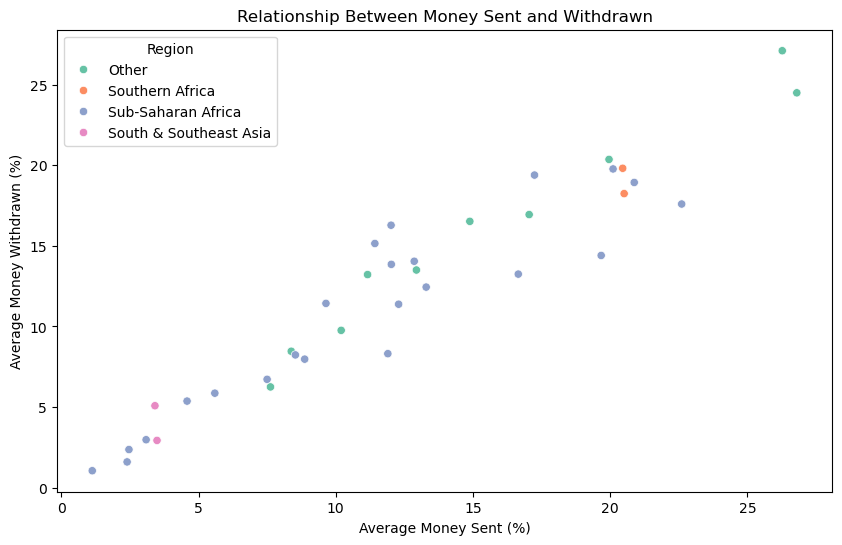

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Sent_Money_Mean',
    y='Withdrew_Money_Mean',
    data=country_df,
    hue='Region',
    palette='Set2'
)
plt.title('Relationship Between Money Sent and Withdrawn')
plt.xlabel('Average Money Sent (%)')
plt.ylabel('Average Money Withdrawn (%)')
plt.show()

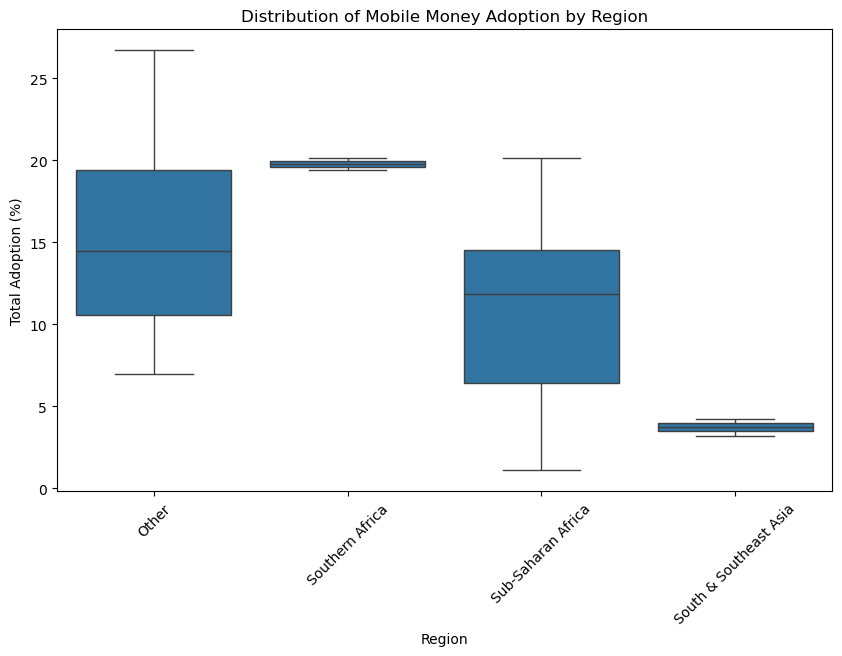

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total_Adoption', data=country_df)
plt.title('Distribution of Mobile Money Adoption by Region')
plt.xlabel('Region')
plt.ylabel('Total Adoption (%)')
plt.xticks(rotation=45)
plt.show()

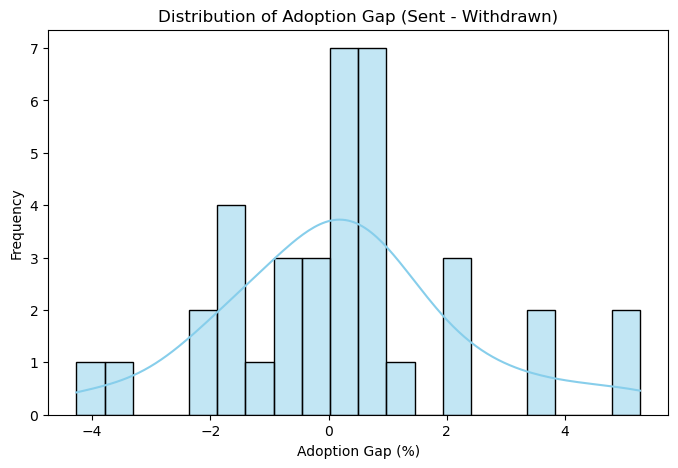

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(country_df['Adoption_Gap'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Adoption Gap (Sent - Withdrawn)')
plt.xlabel('Adoption Gap (%)')
plt.ylabel('Frequency')
plt.show()

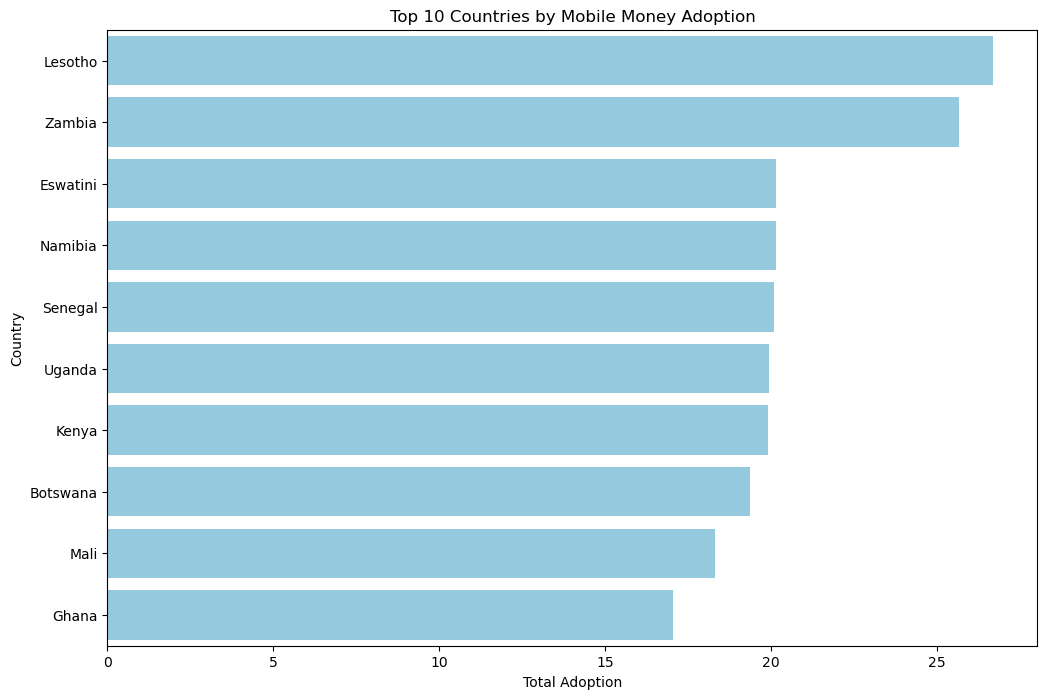

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Total_Adoption',
    y='Country_Name',
    data=country_df.head(10),
    color='skyblue'   # single color
)
plt.title('Top 10 Countries by Mobile Money Adoption')
plt.xlabel('Total Adoption')
plt.ylabel('Country')
plt.show()